In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import arviz as az
import numpy as np

In [27]:
flows = pd.read_csv(r"..\..\UK-wood-mfa\build\flows.csv")
flows_obs= pd.read_csv(r'..\..\UK-wood-mfa\build\flows_obs.csv')
Observations = pd.read_excel(r"..\..\UK-wood-mfa\data\observations_with_references.xlsx")
flows_name = pd.read_excel(r'..\..\UK-wood-mfa\lists\flows_name.xlsx')
products_consumption = pd.read_excel(r'..\..\UK-wood-mfa\data_analysis\finished_products_consumption.xlsx')
products_consumption = products_consumption.set_index(['target'])



In [28]:
flows_name = list(flows_name.to_records())
flows_obs_list = list(flows_obs.to_records())

In [29]:
link = 'http://ukfires.org/analyses/UK-wood/system/'
Consumption = 'Consumption'

In [30]:
#UK consumption of finished products
link = 'http://ukfires.org/analyses/UK-wood/system/'
consumed_products = []
for flow in flows_name:
            consumption_flow_products = flows.loc[(flows['material'] == flow[3]) 
                                       & (flows['source'] == flow[1])
                                       & (flows['target'] == flow[2])]
            if (
                 (('exports ' + link + 'WoodFramesForNewStructures') in flow[2])
                or (('exports ' + link + 'WoodRoofForNewStructures' ) in flow[2])
                or (('exports ' + link + 'SawnwoodToRMIAndOther' ) in flow[2])
                or (('exports ' + link + 'ParticleboardToRMIAndOther' ) in flow[2])
                or (('exports' + link + 'Doors' ) in flow[2])
                or (('exports ' + link + 'OtherEngineeredWoodProducts' ) in flow[2])
                or (('exports ' + link + 'Flooring' ) in flow[2])
                or (('exports ' + link + 'Windows' ) in flow[2])
                or (('exports ' + link + 'PlywoodToRMIAndOther' ) in flow[2])
                or (('exports ' + link + 'FormworkScaffolding' ) in flow[2])
                 ):
                  #  if ((('exports') not in flow[2])
                    #    and (('imports') not in flow[1])
                      
                      
                      
                                                            
                                       # consumption_flow_products = consumption_flow_products.set_index("source")
                          
                                        

                                      
                                                                
                                        consumed_products.append(consumption_flow_products)
                                        

                   
consumed_products = pd.concat(consumed_products)  


#print(consumed_products)                        
#consumed_products = pd.DataFrame(consumed_products, columns= [ "source", "target", "material", "value", "sample"])
consumed_products = consumed_products.groupby(['source','sample']).sum()
consumed_products = consumed_products.reset_index(level='sample')
consumed_products= consumed_products.reset_index(level='source')

consumed_products['value']=consumed_products['value'] / 1000000000
consumed_products.to_clipboard()
consumed_products

C:\Users\rla44\AppData\Local\Temp\ipykernel_14864\2280837951.py:41: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  consumed_products = consumed_products.groupby(['source','sample']).sum()


,source,sample,value,quantity
0,http://ukfires.org/analyses/UK-wood/system/Flo...,0,0.006190,6190293.41
1,http://ukfires.org/analyses/UK-wood/system/Flo...,1,0.005767,5767147.98
2,http://ukfires.org/analyses/UK-wood/system/Flo...,2,0.007752,7751974.73
3,http://ukfires.org/analyses/UK-wood/system/Flo...,3,0.004035,4035093.79
4,http://ukfires.org/analyses/UK-wood/system/Flo...,4,0.006957,6957003.97
...,...,...,...,...
8995,http://ukfires.org/analyses/UK-wood/system/Woo...,995,0.000223,7442.59
8996,http://ukfires.org/analyses/UK-wood/system/Woo...,996,0.000093,4111.06
8997,http://ukfires.org/analyses/UK-wood/system/Woo...,997,0.000072,3097.21
8998,http://ukfires.org/analyses/UK-wood/system/Woo...,998,0.000197,6123.56


In [31]:
consumed_products['target']= 'exports'
consumed_products= consumed_products.groupby(['target','sample']).sum()
consumed_products = consumed_products.reset_index(level='sample')
consumed_products= consumed_products.reset_index(level='target')
consumed_products

C:\Users\rla44\AppData\Local\Temp\ipykernel_14864\2971084793.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  consumed_products= consumed_products.groupby(['target','sample']).sum()


,target,sample,value,quantity
0,exports,0,0.087194,8.707370e+07
1,exports,1,0.102180,1.020998e+08
2,exports,2,0.088777,8.865096e+07
3,exports,3,0.102040,1.019564e+08
4,exports,4,0.106699,1.065028e+08
...,...,...,...,...
995,exports,995,0.102775,1.025597e+08
996,exports,996,0.092975,9.288599e+07
997,exports,997,0.092912,9.284297e+07
998,exports,998,0.091210,9.101950e+07


In [32]:
consumed_products

,target,sample,value,quantity
0,exports,0,0.087194,8.707370e+07
1,exports,1,0.102180,1.020998e+08
2,exports,2,0.088777,8.865096e+07
3,exports,3,0.102040,1.019564e+08
4,exports,4,0.106699,1.065028e+08
...,...,...,...,...
995,exports,995,0.102775,1.025597e+08
996,exports,996,0.092975,9.288599e+07
997,exports,997,0.092912,9.284297e+07
998,exports,998,0.091210,9.101950e+07


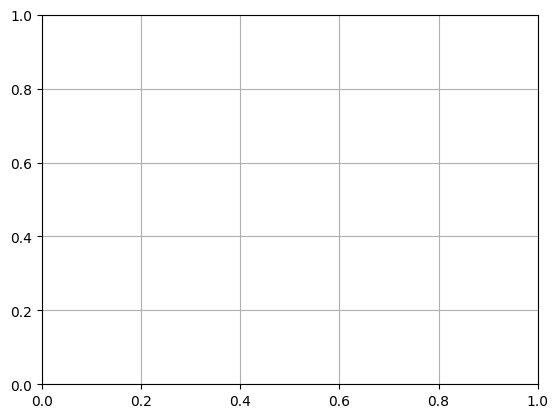

,Object,Uncertainty index,min,max,mean,median,diff_min,diff_max
0,exports,0.383956,0.077803,0.114256,0.09494,0.094891,0.017136,-0.019316


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the difference ratio for each unique 'target'
difference_ratios = []  # List to store the ratios

# Group the data by 'target'
grouped = consumed_products.groupby("target")

for name, group in grouped:
    data = group["value"]
    k = 1.5
  
    # Calculate quartiles and IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Calculate bounds for outlier detection
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Exclude outliers
    filtered_data = [x for x in data if lower_bound <= x <= upper_bound]

    # Calculate minimum and maximum within the non-outlier range
    min_non_outlier = np.min(filtered_data)
    max_non_outlier = np.max(filtered_data)
    
    mean_val = group["value"].mean()
    median_val = group["value"].median()
    Diff_min =  mean_val - min_non_outlier
    Diff_max =  mean_val - max_non_outlier

    difference_ratio = (max_non_outlier - min_non_outlier) / mean_val

    difference_ratios.append((name, difference_ratio,min_non_outlier,max_non_outlier, mean_val,median_val, Diff_min, Diff_max) )  # Store the target name and ratio
    
    
difference_ratios
plt.grid(True)

plt.show()

difference_ratio_df = pd.DataFrame(difference_ratios, columns=['Object', 'Uncertainty index', 'min', 'max', 'mean', 'median', 'diff_min', 'diff_max'])
difference_ratio_df


In [34]:
# Sort the DataFrame by the 'Value' column in descending order
df = difference_ratio_df .sort_values(by='Uncertainty index', ascending=False)
df= df.set_index('Object')


# Create a gradient color map for the 'Value' column
def gradient_color(val):
    max_val = df['Uncertainty index'].max()
    min_val = df['Uncertainty index'].min()
    normalized_value = (val - min_val) / (max_val - min_val)
    r = int(255 * (1 - normalized_value))
    return f'background-color: rgba(255, {r}, 2, 0.5)'


styled_df = df.style.applymap(lambda x: gradient_color(x), subset=['Uncertainty index'])

# Display the styled DataFrame

styled_df

C:\Users\rla44\AppData\Local\Temp\ipykernel_14864\1195321782.py:10: RuntimeWarning: invalid value encountered in scalar divide
  normalized_value = (val - min_val) / (max_val - min_val)


ValueError: cannot convert float NaN to integer

In [35]:
# Specify the file path along with the file name
file_path = r'C:/Users\rla44/OneDrive - University of Bath\MFA graphs/sankey_diagram_3102023'


# Save the plot with the specified file path
fig.savefig(file_path, format='pdf')

# Optionally, specify DPI for higher quality
# plt.savefig(file_path, format='pdf', dpi=300)

NameError: name 'fig' is not defined